# Examples of using Reservoir Class and conceptor_clustering( ) function

Generate a set of multivariate time series dataset (n_samples, n_timestamps, n_features) array. It combines 10 short time series with n_timestamps=100 and 10 long time series with n_timestamps=200

In [4]:
import numpy as np

X_short = np.random.randn(10,100,2)
tail_arr = np.zeros((10,100,2)) + np.NaN
X_short = np.concatenate((X_short,tail_arr),axis=1)
X_long = np.random.randn(10,200,2)
X = np.concatenate((X_short,X_long),axis=0)

build reservoir object

In [7]:
from ConceptorClustering import Reservoir
res = Reservoir(n_features=2)

build reservoir object (assign arguments by users)

In [11]:
from ConceptorClustering import Reservoir

res = Reservoir(n_features=2, 
                n_reservoir=100,
                spectral_radius=0.95, 
                connectivity=0.05,
                random_state=2)

convert these 20 multivariate time series into 20 Conceptors

In [12]:
X_C = res.transform_conceptor(X, alpha=1.)

show an example of Conceptor

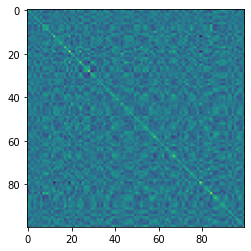

In [13]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(X_C[0])
plt.show()

Clustering the Conceptors (automatically choose number of clusters, corresponding to the max silhouette score)

In [22]:
from ConceptorClustering import conceptor_clustering

labels, silhouette_scores, affinity_matrix = conceptor_clustering(X_C)

Clustering the Conceptors (assign arguments by users)

In [16]:
from ConceptorClustering import conceptor_clustering

labels, silhouette_scores, affinity_matrix = conceptor_clustering(X_C, 
                                                  n_clusters=3,
                                                  n_components=3,
                                                  sigma=1.,
                                                  random_state=2)

# Examples of using ConceptorClustering Class

generate a set of multivariate time series dataset (n_samples, n_timestamps, n_features) array. It combines 10 short time series with n_timestamps=100 and 10 long time series with n_timestamps=200

In [2]:
import numpy as np
X_short = np.random.randn(10,100,2)
tail_arr = np.zeros((10,100,2)) + np.NaN
X_short = np.concatenate((X_short,tail_arr),axis=1)
X_long = np.random.randn(10,200,2)
X = np.concatenate((X_short,X_long),axis=0)

create ConceptorClustering object (automatically choose number of clusters, corresponding to the max silhouette score)

In [4]:
from ConceptorClustering import ConceptorClustering
conceptor_cluster = ConceptorClustering()

create ConceptorClustering object (assign arguments by users)

In [5]:
from ConceptorClustering import ConceptorClustering

conceptor_cluster = ConceptorClustering(n_clusters=3,
                                        n_reservoir=100, 
                                        spectral_radius=0.95, 
                                        connectivity=0.05, 
                                        sigma=1.,
                                        random_state=1)

use fit( ) function to obtain prediction labels, silhouette scores and affinity matrix

In [ ]:
conceptor_cluster.fit(X)
print(conceptor_cluster.labels_)
print(conceptor_cluster.silhouette_scores_)
print(conceptor_cluster.affinity_matrix_)

use fit_predict( ) function to obtain prediction_labels

In [ ]:
labels = conceptor_cluster.fit_predict(X)
print(labels)